In [1]:
#
# Computing diffusion coeff and exponent alpha from individual msd
#

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from os import listdir
import pickle
#from os.path import isfile, join
import matplotlib.pyplot as plt
from scipy.stats import brunnermunzel, linregress
from sklearn.linear_model import LinearRegression

In [79]:
#
# read csv files
#

file_id = 'SK577' + '-2'

df = pd.read_csv(os.path.join('data', file_id + '.csv'))

dir_save = 'results_' + file_id
dir_save = dir_save.replace('-', '_')
print(dir_save)
os.makedirs(dir_save, exist_ok=True)
#print(df)
#print(df2)
#df['m0'] = df2['m0']
print(df)
n_traj = df['Trajectory'].max()
print('# of trajectories: ', n_traj)

results_SK577_2
              Trajectory  Frame        x        y  z     m0     m1     m2  \
0          1           1      0   11.246    3.661  0  0.898  1.357  2.351   
1          2           1      1   11.324    2.904  0  1.525  1.394  2.467   
2          3           1      2   12.676    4.741  0  1.527  1.656  3.338   
3          4           2      0  476.951    6.335  0  1.231  1.322  2.195   
4          5           2      1  476.832    6.109  0  1.093  1.368  2.357   
...      ...         ...    ...      ...      ... ..    ...    ...    ...   
30638  30639        5363    100  261.418  553.328  0  1.539  1.358  2.315   
30639  30640        5364     99  248.533  560.046  0  1.153  1.461  2.658   
30640  30641        5364    100  249.758  558.726  0  1.515  1.568  3.004   
30641  30642        5365     99  252.556  574.569  0  0.995  1.150  1.671   
30642  30643        5365    100  253.267  573.344  0  0.740  1.307  2.179   

          m3      m4  NPscore  
0      4.557   9.680    0.0

0  th traj length =  3
1  th traj length =  22
2  th traj length =  6
3  th traj length =  2
4  th traj length =  7
5  th traj length =  47
6  th traj length =  6
7  th traj length =  5
8  th traj length =  4
9  th traj length =  4


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

1.4435226771752452


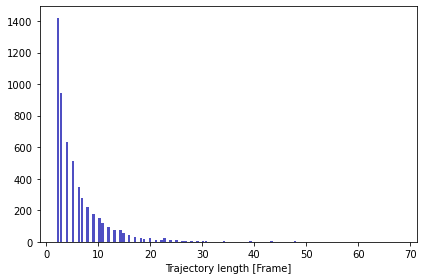

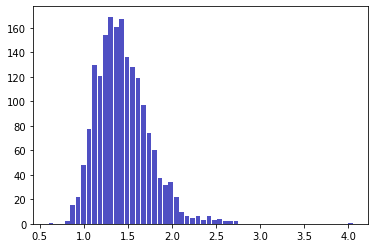

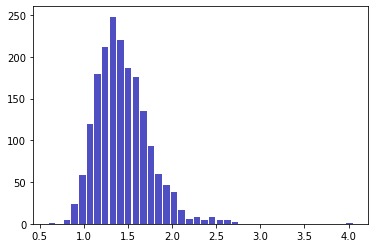

In [80]:
#
# basic characterization
#
lengths = []
m0s = []
for n in range(n_traj):
    df2 = df.loc[df['Trajectory'] == n+1]
    lengths.append(df2.shape[0])
    if n < 10:
        print(n, ' th traj length = ', df2.shape[0])
    if df2.shape[0] > 5:
        m0s.append(df2['m0'].mean())

lengths = np.array(lengths)
m0s = np.array(m0s)
print(np.mean(m0s))

fig, ax = plt.subplots()
n, bins, patches = plt.hist(x=lengths, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.xlabel('Trajectory length [Frame]')
plt.tight_layout()
plt.savefig(os.path.join(dir_save, 'hist_traj_length.eps'))

fig, ax = plt.subplots()
n, bins, patches = plt.hist(x=m0s, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)

fig, ax = plt.subplots()
n, bins, patches = plt.hist(x=m0s[m0s[:] < 20000], bins=40, color='#0504aa', alpha=0.7, rwidth=0.85)

(47,) (47,)
(47, 2)


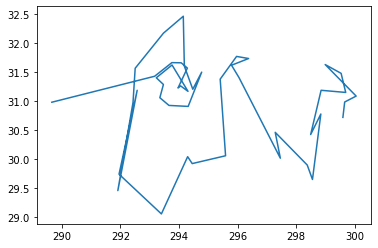

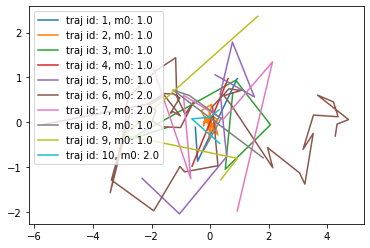

In [81]:
#
# data visualization
#
def select_single_trajectory(df, id_traj = 1, verbosity=1):
    df2 = df.loc[df['Trajectory'] == id_traj]
    #if id_cell == 1: print(df2)# for debug
    coord_x = df2['x'].to_numpy()
    coord_y = df2['y'].to_numpy()
    if verbosity == 1:
        print(coord_x.shape, coord_y.shape)
    return np.stack([coord_x, coord_y], axis=-1)

def compute_total_intensity(df, id_traj = 1):
    df2 = df.loc[df['Trajectory'] == id_traj]
    return df2['m0'].mean()

xy = select_single_trajectory(df, 6)
print(xy.shape)
fig, ax = plt.subplots()
plt.plot(xy[:, 0], xy[:, 1])

fig, ax = plt.subplots()
for n in range(10):
    xy = select_single_trajectory(df, n+1, verbosity=0)
    m0 = compute_total_intensity(df, n+1)
    mean_xy = np.mean(xy, axis=0)
    label = 'traj id: ' + str(n+1) + ', m0: ' + str(np.round(m0))
    plt.plot(xy[:, 0] - mean_xy[0], xy[:, 1] - mean_xy[1], label=label)
plt.legend()

len(msds) =  828


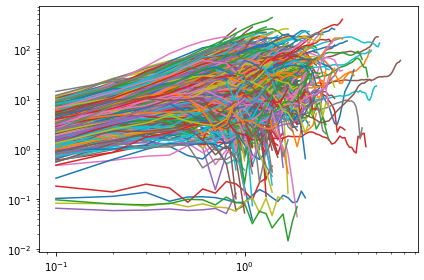

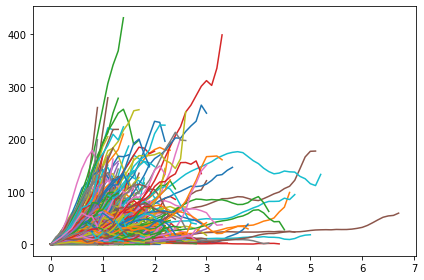

In [82]:
#
# MSD analysis
#
def naive_msd(r):
    shifts = np.arange(len(r))
    msd = np.zeros(shifts.size)

    for i, shift in enumerate(shifts):
        diffs = r[:-shift if shift else None, :] - r[shift:, :]# if shift == 0, r[:None, :] not r[None, :]
        sqdist = np.square(diffs).sum(axis=1)
        msd[i] = sqdist.mean()

    return msd

msds = []
for n in range(n_traj):
    xy = select_single_trajectory(df, n+1, verbosity=0)
    if xy.shape[0] >= 10:
        #disp = (xy - xy[0, :])[1:]
        msd = naive_msd(xy)
        msds.append(msd)
print('len(msds) = ', len(msds))
num_msd = len(msds)

with open(os.path.join(dir_save, 'msds'), 'wb') as fp:
    pickle.dump(msds, fp)

fig, ax = plt.subplots()
for msd in msds:
    ts = 0.1 * np.arange(msd.shape[0])
    plt.loglog(ts[1:], msd[1:])
plt.tight_layout()
plt.savefig(os.path.join(dir_save, 'msds_log.eps'))

fig, ax = plt.subplots()
for msd in msds:
    ts = 0.1 * np.arange(msd.shape[0])
    plt.plot(ts, msd)
plt.tight_layout()
plt.savefig(os.path.join(dir_save, 'msds_normal.eps'))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

0.4119321961365858
828


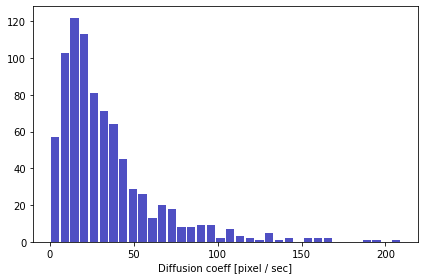

In [83]:
#
# individual diffusion coeffs assuming normal diffusion, following the protocol in (Delarue, Cell, 2018)
#
diffs = []
for msd in msds:
    msd_trunc = msd[:10]
    ts = 0.1 * np.arange(msd_trunc.shape[0])
    reg = LinearRegression(fit_intercept=False).fit(ts.reshape(-1, 1), msd_trunc)
    #print(reg.coef_)
    #res = linregress(ts, msd_trunc) # for comparison
    #print(res.slope)
    diffs.append(reg.coef_[0])

diffs = np.array(diffs)
fig, ax = plt.subplots()
n, bins, patches = plt.hist(x=diffs, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.85)
plt.xlabel('Diffusion coeff [pixel / sec]')
plt.tight_layout()
plt.savefig(os.path.join(dir_save, 'hist_diff_coeff.eps'))

Deff = (diffs/4)*0.26*0.26 # Deff(pixel/sec)からDeff(um^2/sec)へ変換
print(np.median(Deff)) 
print(np.count_nonzero(Deff))

np.savetxt(os.path.join(dir_save, 'Deff.txt'), Deff)

      0         1          2          3          4          5          6   \
0    0.0  0.102610   0.112883   0.135948   0.090303   0.109751   0.110958   
1    0.0  1.015845   1.709490   2.523475   3.660197   4.513778   5.410833   
2    0.0  5.372955   6.200144  12.324954  16.577769  18.248666  20.497893   
3    0.0  1.573880   4.039346   6.422796   8.099686  10.903443  13.760794   
4    0.0  0.664573   1.490130   2.250316   2.169747   1.707317   1.051341   
..   ...       ...        ...        ...        ...        ...        ...   
823  0.0  4.008157   6.509949  10.302469  13.168331  18.042653  27.475244   
824  0.0  3.140290   8.626821  16.075235  24.279488  33.172923  44.000531   
825  0.0  4.871743   9.591053  10.256443   9.279985   9.878533  10.351586   
826  0.0  6.528069  13.919840  22.511591  30.362330  46.153147  59.857346   
827  0.0  2.294360   7.267217  13.359842  18.454564  20.755644  22.375239   

            7          8          9   ...  58  59  60  61  62  63  64  65  

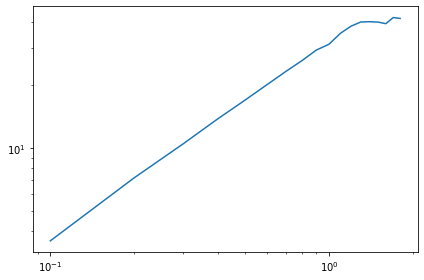

In [84]:
#
# Ensemble-averaged MSD
#
#for msd in msds:
#    print(msd.shape)
df_msds = pd.DataFrame(msds)
print(df_msds)
ens_msd = df_msds.mean(0, skipna=True).values
print(ens_msd)

fig, ax = plt.subplots()
ts = 0.1 * np.arange(ens_msd.shape[0])
plt.loglog(ts[1:19], ens_msd[1:19])
plt.tight_layout()
plt.savefig(os.path.join(dir_save, 'ens_msd_log.eps'))

res = linregress(np.log(ts[1:11]), np.log(ens_msd[1:11])) # for comparison
print(res, res.slope)

np.savetxt(os.path.join(dir_save, 'ens_msd.txt'), ens_msd)